In [3]:
import pandas as pd

# Load the dataset
df = pd.read_excel('../Data/RADCURE_Clinical_v04_20241219.xlsx')

# Show the shape and first few rows
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (3346, 34)


,patient_id,Age,Sex,ECOG PS,Smoking PY,Smoking Status,Ds Site,Subsite,T,N,...,Local,Date Local,Regional,Date Regional,Distant,Date Distant,2nd Ca,Date 2nd Ca,RADCURE-challenge,ContrastEnhanced
0,RADCURE-0005,62.6,Female,ECOG 0,50,Ex-smoker,Oropharynx,post wall,T4b,N2c,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,0
1,RADCURE-0006,87.3,Male,ECOG 2,25,Ex-smoker,Larynx,Glottis,T1b,N0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,1
2,RADCURE-0007,49.9,Male,ECOG 1,15,Ex-smoker,Oropharynx,Tonsil,T3,N2b,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,1
3,RADCURE-0009,72.3,Male,ECOG 1,30,Ex-smoker,Unknown,NaN,T0,N2c,...,NaN,NaT,NaN,NaT,NaN,NaT,S (suspicious),2008-05-27,0,0
4,RADCURE-0010,59.7,Female,ECOG 0,0,Non-smoker,Oropharynx,Tonsillar Fossa,T4b,N0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,0


In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Load dataset
df = pd.read_excel("../Data/RADCURE_Clinical_v04_20241219.xlsx")

# Quick check
df.head()


,patient_id,Age,Sex,ECOG PS,Smoking PY,Smoking Status,Ds Site,Subsite,T,N,...,Local,Date Local,Regional,Date Regional,Distant,Date Distant,2nd Ca,Date 2nd Ca,RADCURE-challenge,ContrastEnhanced
0,RADCURE-0005,62.6,Female,ECOG 0,50,Ex-smoker,Oropharynx,post wall,T4b,N2c,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,0
1,RADCURE-0006,87.3,Male,ECOG 2,25,Ex-smoker,Larynx,Glottis,T1b,N0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,1
2,RADCURE-0007,49.9,Male,ECOG 1,15,Ex-smoker,Oropharynx,Tonsil,T3,N2b,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,1
3,RADCURE-0009,72.3,Male,ECOG 1,30,Ex-smoker,Unknown,NaN,T0,N2c,...,NaN,NaT,NaN,NaT,NaN,NaT,S (suspicious),2008-05-27,0,0
4,RADCURE-0010,59.7,Female,ECOG 0,0,Non-smoker,Oropharynx,Tonsillar Fossa,T4b,N0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,0


In [6]:
df.columns.tolist()


['patient_id',
 'Age',
 'Sex',
 'ECOG PS',
 'Smoking PY',
 'Smoking Status',
 'Ds Site',
 'Subsite',
 'T',
 'N',
 'M ',
 'Stage',
 'Path',
 'HPV',
 'Tx Modality',
 'Chemo',
 'RT Start',
 'Dose',
 'Fx',
 'Last FU',
 'Status',
 'Length FU',
 'Date of Death',
 'Cause of Death',
 'Local',
 'Date Local',
 'Regional',
 'Date Regional',
 'Distant',
 'Date Distant',
 '2nd Ca',
 'Date 2nd Ca',
 'RADCURE-challenge',
 'ContrastEnhanced']

In [7]:
df[['Length FU', 'Status', 'Date of Death']].head(10)


,Length FU,Status,Date of Death
0,1.317808,Dead,2003-05-12
1,1.520548,Dead,2007-06-28
2,2.126027,Alive,NaT
3,5.791781,Alive,NaT
4,9.512329,Alive,NaT
5,5.372603,Alive,NaT
6,11.876712,Alive,NaT
7,4.189041,Dead,2009-08-01
8,1.712329,Dead,2002-01-02
9,8.991781,Dead,2008-06-30


In [8]:
# Convert Status to numeric event: 1 if Dead, 0 if Alive
df['event'] = df['Status'].apply(lambda x: 1 if x == 'Dead' else 0)

# Create age group column: <=60 and >60
df['age_group'] = np.where(df['Age'] <= 60, 'Age ≤ 60', 'Age > 60')

# Check the new columns
df[['Length FU', 'Status', 'event', 'Age', 'age_group']].head(10)


,Length FU,Status,event,Age,age_group
0,1.317808,Dead,1,62.6,Age > 60
1,1.520548,Dead,1,87.3,Age > 60
2,2.126027,Alive,0,49.9,Age ≤ 60
3,5.791781,Alive,0,72.3,Age > 60
4,9.512329,Alive,0,59.7,Age ≤ 60
5,5.372603,Alive,0,72.3,Age > 60
6,11.876712,Alive,0,61.0,Age > 60
7,4.189041,Dead,1,77.4,Age > 60
8,1.712329,Dead,1,70.8,Age > 60
9,8.991781,Dead,1,70.2,Age > 60


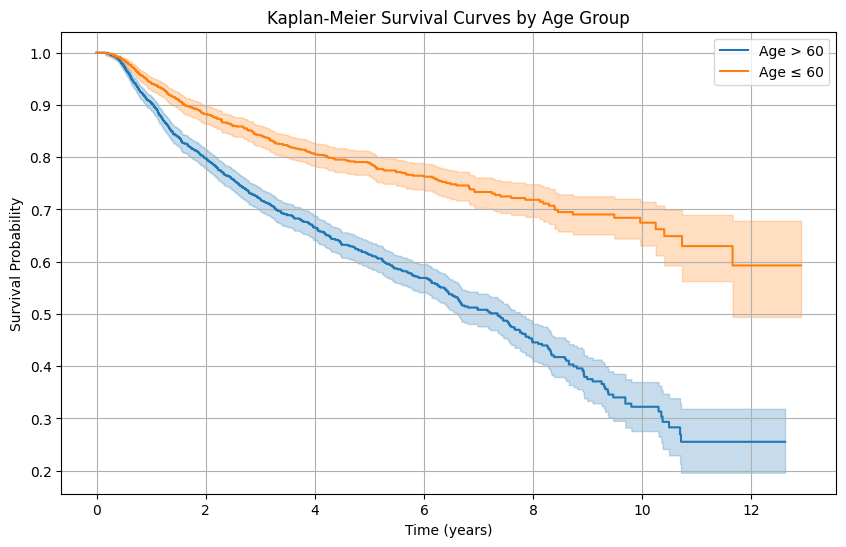

Log-rank test p-value: 0.0000


In [9]:
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Prepare figure
plt.figure(figsize=(10,6))

# Plot KM curves for each age group
for group in df['age_group'].unique():
    mask = df['age_group'] == group
    kmf.fit(durations=df.loc[mask, 'Length FU'],
            event_observed=df.loc[mask, 'event'],
            label=group)
    kmf.plot_survival_function(ci_show=True)

plt.title('Kaplan-Meier Survival Curves by Age Group')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

# Log-rank test between the two groups
group1 = df[df['age_group'] == 'Age ≤ 60']
group2 = df[df['age_group'] == 'Age > 60']

results = logrank_test(group1['Length FU'], group2['Length FU'],
                       event_observed_A=group1['event'],
                       event_observed_B=group2['event'])

print(f"Log-rank test p-value: {results.p_value:.4f}")


In [17]:
from lifelines import CoxPHFitter

# Select relevant columns for Cox model
# Pick at least 3 covariates from dataset, e.g., Age, Sex, and Tx Modality (Treatment Modality)

# Prepare dataframe for CoxPHFitter
cox_df = df[['Length FU', 'event', 'Age', 'Sex', 'Tx Modality']].copy()

# Encoding categorical variables
cox_df = pd.get_dummies(cox_df, columns=['Sex', 'Tx Modality'], drop_first=True)

# Rename columns for clarity (optional)
cox_df.rename(columns={'Length FU':'duration', 'event':'event'}, inplace=True)

# Initialize and fit Cox model
cph = CoxPHFitter()
cph.fit(cox_df, duration_col='duration', event_col='event')

# Print summary
print(cph.summary)


                                  coef  exp(coef)    se(coef)  coef lower 95%  \
covariate                                                                       
Age                           0.036110   1.036770    0.003149        0.029938   
Sex_Male                      0.012257   1.012333    0.076778       -0.138224   
Tx Modality_ChemoRT         -11.614722   0.000009  727.138919    -1436.780815   
Tx Modality_Postop RT alone   1.281013   3.600286    0.710136       -0.110828   
Tx Modality_RT + EGFRI        0.587284   1.799096    0.183084        0.228445   
Tx Modality_RT alone          0.352832   1.423092    0.075760        0.204346   

                             coef upper 95%  exp(coef) lower 95%  \
covariate                                                          
Age                                0.042282             1.030391   
Sex_Male                           0.162739             0.870904   
Tx Modality_ChemoRT             1413.551372             0.000000   
Tx Modality

In [21]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

y = Surv.from_dataframe('event', 'duration', cox_df)
X = cox_df.drop(columns=['duration', 'event'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(X_train, y_train)

# Permutation importance
result = permutation_importance(rsf, X_test, y_test, n_repeats=10, random_state=42)
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X.columns[i]}: {result.importances_mean[i]:.4f}")

# Predict risk scores
risk_scores = rsf.predict(X_test)

cindex_rsf = concordance_index_censored(y_test['event'], y_test['duration'], risk_scores)[0]
cindex_cox = cph.concordance_index_

print(f"RSF Concordance Index: {cindex_rsf:.4f}")
print(f"Cox Concordance Index: {cindex_cox:.4f}")


Age: 0.0488
Sex_Male: 0.0147
Tx Modality_Postop RT alone: 0.0000
Tx Modality_ChemoRT : 0.0000
Tx Modality_RT + EGFRI: -0.0026
Tx Modality_RT alone: -0.0095
RSF Concordance Index: 0.5554
Cox Concordance Index: 0.6264
